__Цель курсовой работы:__ Использовать различные методы регрессии для прогнозирования цен на дома в округе Кинг на основе предоставленного набора данных, провести сравнительный анализ этих методов и оценить их эффективность в данной задаче.

__Задачи курсовой работы:__

1. Провести анализ и исследование набора данных о ценах на дома в округе Кинг и Сиэтл, включая ознакомление с особенностями исходных данных и их визуализацию.
2. Разработать и обучить модели регрессии с использованием выбранных алгоритмов (например, линейная регрессия, регрессия Lasso, регрессия Ridge, деревья решений, случайный лес и т. д.) для прогнозирования цен на дома.
3. Оценить качество работы моделей с помощью выбранных метрик (например, Mean Squared Error, Root Mean Squared Error, Mean Absolute Error, R^2 Score).
4. Провести сравнительный анализ качества различных методов регрессии для прогнозирования цен на дома в округе Кинг.
5. Описать результаты исследования и сделать выводы о наилучших методах регрессии для прогнозирования цен на дома в округе Кинг.

In [4]:
from sklearn.datasets import fetch_openml

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,mean_absolute_percentage_error
from sklearn.model_selection import RandomizedSearchCV


from scipy.stats import uniform, randint
from time import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Загрузка данных

In [5]:
data = fetch_openml("house_sales", version=1)  

In [6]:
print(data.DESCR)

**Author**: https://www.kaggle.com/harlfoxem/  
https://www.kaggle.com/harlfoxem/  
**Source**: [original](https://www.kaggle.com/harlfoxem/housesalesprediction) - 2016-08-25  
**Please cite**:   

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

It contains 19 house features plus the price and the id columns, along with 21613 observations.
It's a great dataset for evaluating simple regression models.

* Id: Unique ID for each home sold
* Date: Date of the home sale
* Price: Price of each home sold
* Bedrooms: Number of bedrooms
* Bathrooms: Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* Sqft_living: Square footage of the apartments interior living space
* Sqft_lot: Square footage of the land space
* Floors: Number of floors
* Waterfront: A dummy variable for whether the apartment was overlooking the waterfront or not
* View: An index from 0 to 4 of how good the view 

## Описание данных

Этот набор данных содержит цены на продажу домов в округе Кинг, который включает в себя Сиэтл. Он включает в себя дома, проданные между маем 2014 года и маем 2015 года.

Он содержит 19 характеристик дома, плюс цену и столбцы id, а также 21613 наблюдений.
Это отличный набор данных для оценки простых регрессионных моделей.

* Id: Уникальный ID для каждого проданного дома
* Date: Дата продажи дома
* Price: Цена каждого проданного дома
* Bedrooms: Количество спален
* Bathrooms: Количество ванных комнат, где .5 учитывает комнату с туалетом, но без душа
* Sqft_living: Площадь внутреннего жилого пространства квартиры
* Sqft_lot: Площадь земельного участка
* Floors: Количество этажей
* Waterfront: Фиктивная переменная, указывающая, выходила ли квартира на набережную или нет
* View: Индекс от 0 до 4, насколько хорошим был вид на недвижимость
* Condition: Индекс от 1 до 5 по состоянию квартиры
* Grade: Индекс от 1 до 13, где 1-3 не соответствуют строительству и дизайну здания, 7 имеет средний уровень строительства и дизайна, а 11-13 имеют высокий уровень качества строительства и дизайна
* Sqft_above: Площадь внутреннего жилого пространства, которое находится над уровнем земли.
* Sqft_basement: Площадь внутреннего жилого пространства, которое находится ниже уровня земли.
* Yr_built: Год, когда дом был изначально построен
* Yr_renovated: Год последней реновации дома
* Zipcode: Почтовый индекс района, в котором находится дом
* Lat: Широта
* Long: Долгота
* Sqft_living15: Площадь внутреннего жилого пространства для ближайших 15 соседей.
* Sqft_lot15: Площадь земельных участков ближайших 15 соседей.

In [7]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df = df.drop(['date'], axis=1) # не интересует время
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3.0,2.50,1530.0,1131.0,3.0,0.0,0.0,3.0,8.0,1530.0,0.0,2009.0,0.0,98103.0,47.6993,-122.346,1530.0,1509.0
21609,400000.0,4.0,2.50,2310.0,5813.0,2.0,0.0,0.0,3.0,8.0,2310.0,0.0,2014.0,0.0,98146.0,47.5107,-122.362,1830.0,7200.0
21610,402101.0,2.0,0.75,1020.0,1350.0,2.0,0.0,0.0,3.0,7.0,1020.0,0.0,2009.0,0.0,98144.0,47.5944,-122.299,1020.0,2007.0
21611,400000.0,3.0,2.50,1600.0,2388.0,2.0,0.0,0.0,3.0,8.0,1600.0,0.0,2004.0,0.0,98027.0,47.5345,-122.069,1410.0,1287.0


## Описательный анализ

In [8]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
df.dtypes

price            float64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view             float64
condition        float64
grade            float64
sqft_above       float64
sqft_basement    float64
yr_built         float64
yr_renovated     float64
zipcode          float64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
dtype: object

#### Все признаки и целевая переменная - численные - вещественного или целого типа (float64 или int64)

In [10]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#### Пропуски в датасете отсутствуют.

In [11]:
print(f'Дубликатов до удаления = {df.duplicated().sum()}, размерность = {df.shape}')
df = df.drop_duplicates()
print(f'Дубликатов после удаления = {df.duplicated().sum()}, размерность = {df.shape}')

Дубликатов до удаления = 5, размерность = (21613, 19)
Дубликатов после удаления = 0, размерность = (21608, 19)


## Исследовательский анализ

In [12]:
def plot_numeric_features(df, features):
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(features):
        plt.subplot(5, 4, i + 1)
        sns.histplot(df[feature], bins=20, color='brown')
        plt.title(feature)
        plt.xlabel('')
    plt.tight_layout()
    plt.show()
    
def plot_boxplot(df, features):
    num_plots = len(features)
    num_cols = 2
    num_rows = num_plots // num_cols + 1

    plt.figure(figsize=(15, 5 * num_rows))

    for i, feature in enumerate(features):
        plt.subplot(num_rows, num_cols, i + 1)
        sns.boxplot(data=df, y=feature, palette='pastel')
        plt.title(feature)
        plt.ylabel('')
        plt.tight_layout()

    plt.show()


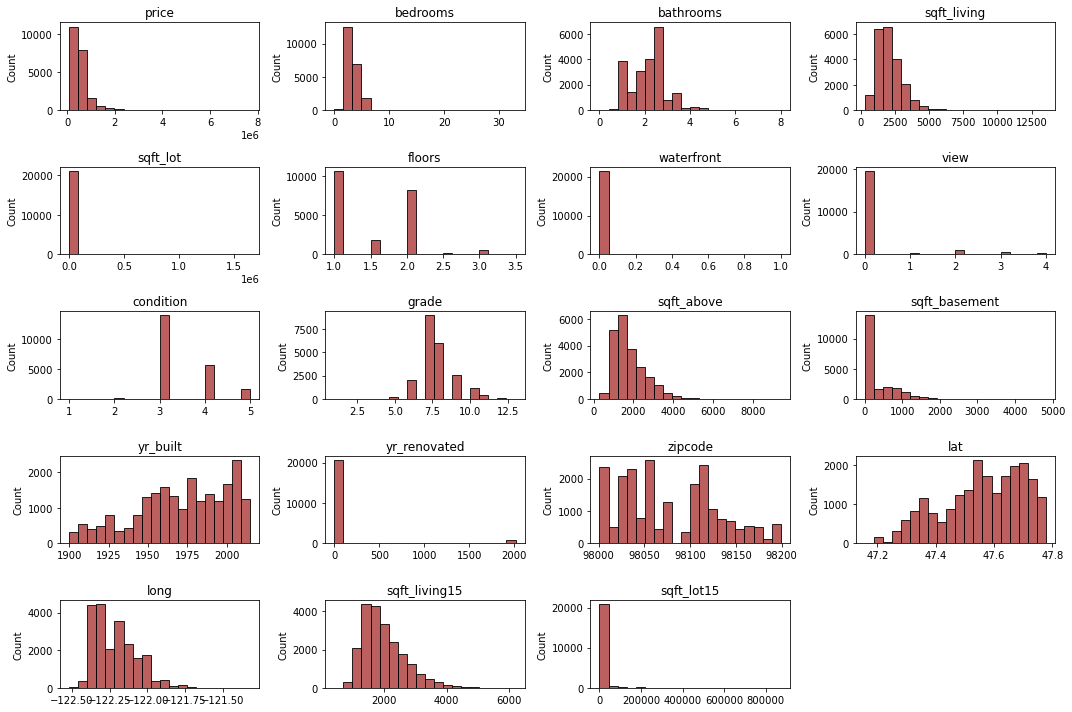

In [13]:
plot_numeric_features(df, df.columns)

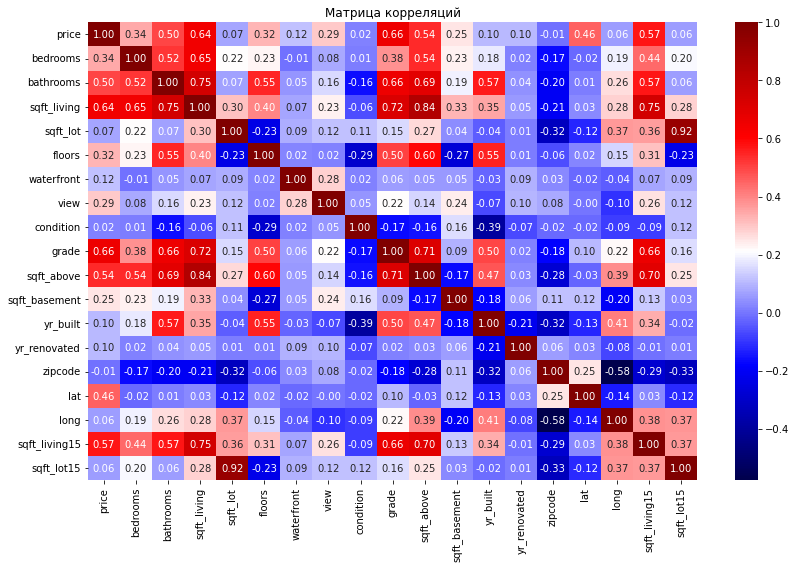

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(method='spearman'), annot=True, cmap='seismic', fmt=".2f") # коэффициент Спирмена, поскольку не все данные нормально распределены
plt.title('Матрица корреляций')

plt.tight_layout()
plt.show()

- yr_renovated, sqft_lot, sqft_lot15, view заполнены в основном нулями. 
- floors, condition, waterfront бесполезны, поскольку condition большинства равен 3, waterfront имеет явный дисбаланс, этажность никакого вклада не вносит (большинство домов 1-2-этажны)
- sqft_living15 дублирует признак sqft_living, что фактически создает мультиколлинеарность, избегаем этого и избавляемся от sqft_living15   

Удалим перечисленные признаки:

In [15]:
print(f'Размерность до удаления: {df.shape}')
df = df.drop(['sqft_lot15', 'sqft_living15', 'yr_renovated', 'view', 'condition', 'floors', 'sqft_lot', 'waterfront', 'long'], axis=1)
print(f'Размерность после удаления: {df.shape}')

Размерность до удаления: (21608, 19)
Размерность после удаления: (21608, 10)


## Корреляционный анализ

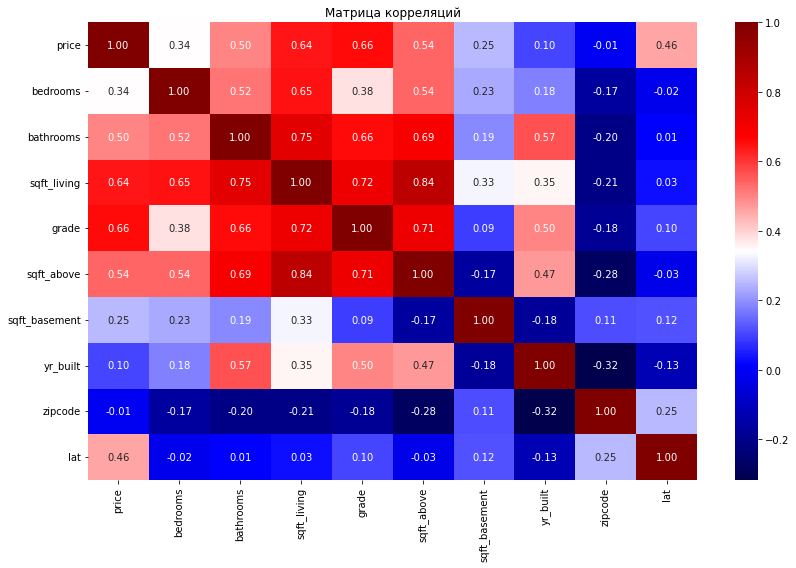

In [16]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(method='spearman'), annot=True, cmap='seismic', fmt=".2f") # коэффициент Спирмена, поскольку не все данные нормально распределены
plt.title('Матрица корреляций')

plt.tight_layout()
plt.show()

__Мультиколлинеарность отсутствует.__

## Первые модели регрессии на отобранных признаках и всех наблюдениях


In [17]:
y = df['price']
X = df.drop(['price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=42)

X_train.shape, X_test.shape

((17286, 9), (4322, 9))

Следующие модели регрессии представляют различные подходы к моделированию зависимости между признаками и целевой переменной, включая линейные, модели деревьев для принятия решений, ансамблевые методы и нейронные сети. Их сравнение позволяет оценить, как каждый метод справляется с конкретной задачей, выявить их преимущества и недостатки, а также выбрать наиболее подходящий метод для конкретного набора данных и требований к модели.

In [19]:
models = {
    "linear_regression": LinearRegression(),
    "ridge_regression": Ridge(),
    "lasso_regression": Lasso(),
    "decision_tree_regression": DecisionTreeRegressor(),
    "random_forest_regression": RandomForestRegressor(),
    "gradient_boosting_regression": GradientBoostingRegressor(),
    'CatBoost': CatBoostRegressor(verbose=0),
    'Neural Network': MLPRegressor(max_iter=500),
    "elastic_net": ElasticNet()
}

In [21]:
for name, model in models.items():
    model.fit(X_train, y_train)  
    predictions = model.predict(X_test)  

    mse = mean_squared_error(y_test, predictions)
    rmse = mse**0.5 
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    mape = mean_absolute_percentage_error(y_test, predictions)
    
    print(f"Model: {name}")
    print(f"Mean Squared Error: {mse}")
    print(f'Root Mean Square Error: {rmse}')
    print(f"Mean Absolute Error: {mae}")
    print(f"R^2 Score: {r2}")
    print(f"Mean Absolute Percentage Error: {mape}")

    print()

Model: linear_regression
Mean Squared Error: 49080891621.96522
Root Mean Square Error: 221542.07641431282
Mean Absolute Error: 135559.33047398282
R^2 Score: 0.6552494203389049
Mean Absolute Percentage Error: 0.26526365525060064

Model: ridge_regression
Mean Squared Error: 49081519663.21111
Root Mean Square Error: 221543.49384085083
Mean Absolute Error: 135549.9929201802
R^2 Score: 0.6552450088953385
Mean Absolute Percentage Error: 0.265221940363872

Model: lasso_regression
Mean Squared Error: 49080920675.442726
Root Mean Square Error: 221542.14198531784
Mean Absolute Error: 135558.90642237995
R^2 Score: 0.6552492162634922
Mean Absolute Percentage Error: 0.26526171514827707

Model: decision_tree_regression
Mean Squared Error: 63043890635.89785
Root Mean Square Error: 251085.42497703416
Mean Absolute Error: 122642.04627487274
R^2 Score: 0.5571714954116758
Mean Absolute Percentage Error: 0.20938232482230643

Model: random_forest_regression
Mean Squared Error: 27741726136.289513
Root Mean 

1. Mean Squared Error:
MSE измеряет среднее значение квадратов разностей между фактическими ценами квартир и предсказанными ценами.
2. Root Mean Square Error:
Является корнем из MSE и измеряет среднеквадратичное отклонение предсказанных цен квартир от фактических.
RMSE измеряется в тех же единицах, что и целевая переменная.
3. Mean Absolute Error:
MAE измеряет среднее значение абсолютных разностей между фактическими и предсказанными ценами квартир.
Он также измеряется в единицах цены квартир и представляет собой среднее абсолютное отклонение предсказаний от фактических значений.
4. R^2 Score:
R^2 измеряет долю изменчивости цен квартир, которая объясняется моделью.
Значение R^2 находится в диапазоне от 0 до 1, где 1 указывает на идеальное соответствие данных модели.
5. Mean Absolute Percentage Error:
Эта метрика выражает ошибку как процент от фактических цен квартир и может быть полезна для интерпретации точности предсказаний.

__Исходя из представленных результатов, лучшие модели для прогнозирования цен квартир:__

1. CatBoost:
Наименьшее значение Root Mean Square Error (RMSE), что указывает на более точные прогнозы цен квартир.
Высокий коэффициент детерминации (R^2 Score), что говорит о том, что модель хорошо соответствует данным.
Наименьшее значение Mean Absolute Percentage Error (MAPE), что означает, что прогнозы модели имеют наименьшую среднюю абсолютную процентную ошибку.
2. Gradient Boosting Regression:
Близкое к наименьшему RMSE значение, что также указывает на высокую точность предсказаний цен квартир.
Высокий коэффициент детерминации (R^2 Score), подтверждающий хорошее соответствие модели данным.
Относительно низкое значение MAPE, указывающее на небольшую среднюю абсолютную процентную ошибку модели.
3. Random Forest Regression:
Относительно низкое значение RMSE и высокий R^2 Score, что свидетельствует о хорошей точности и соответствии модели данным.
Эти модели были выбраны из-за их высокой точности в прогнозировании цен квартир, хорошего соответствия данным и относительно низкой средней абсолютной процентной ошибки.

__Существуют такие цены, которые значительно отклоняются от большинства значений. Рассмотрим их на первом графике:__

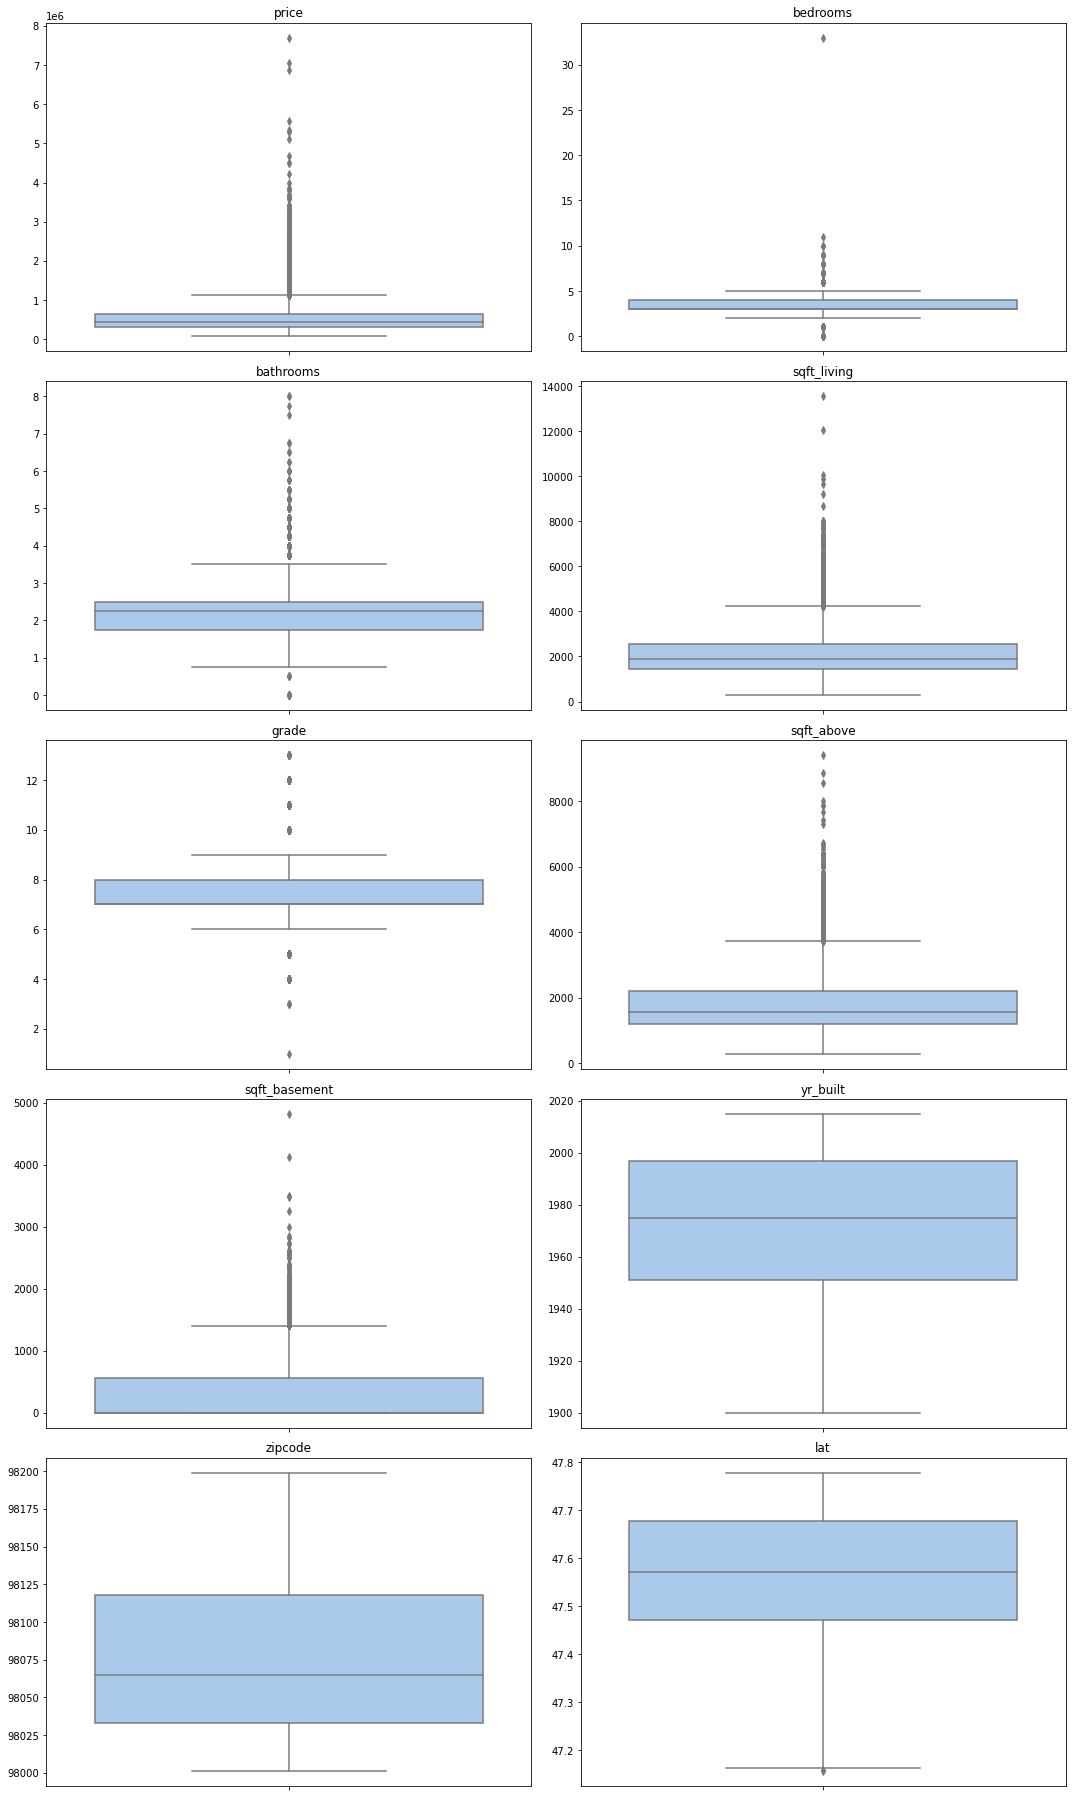

In [22]:
plot_boxplot(df, df.columns)

Удалим 1% наблюдений максимальных цен.

In [23]:
print(f'До удаления: {df.shape}')
df = df[df['price'] <= 2000000]
print(f'После удаления: {df.shape}')

До удаления: (21608, 10)
После удаления: (21410, 10)


## Модели на отобранных наблюдениях

In [24]:
y = df['price']
X = df.drop(['price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=42)

X_train.shape, X_test.shape

((17128, 9), (4282, 9))

In [25]:
for name, model in models.items():
    model.fit(X_train, y_train)  
    predictions = model.predict(X_test)  

    mse = mean_squared_error(y_test, predictions)
    rmse = mse**0.5 
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    mape = mean_absolute_percentage_error(y_test, predictions)
    
    
    print(f"Model: {name}")
    print(f"Mean Squared Error: {mse}")
    print(f'Root Mean Square Error: {rmse}')
    print(f"Mean Absolute Error: {mae}")
    print(f"R^2 Score: {r2}")
    print(f"Mean Absolute Percentage Error: {mape}")

    print()

Model: linear_regression
Mean Squared Error: 28278801160.3242
Root Mean Square Error: 168163.01959802042
Mean Absolute Error: 115436.53068242533
R^2 Score: 0.6667521523694533
Mean Absolute Percentage Error: 0.24216807758072592

Model: ridge_regression
Mean Squared Error: 28279889922.79574
Root Mean Square Error: 168166.2567901056
Mean Absolute Error: 115431.43373758814
R^2 Score: 0.66673932198997
Mean Absolute Percentage Error: 0.24215522924023436

Model: lasso_regression
Mean Squared Error: 28278842945.45792
Root Mean Square Error: 168163.1438379347
Mean Absolute Error: 115436.29610904284
R^2 Score: 0.6667516599579895
Mean Absolute Percentage Error: 0.24216727192426793

Model: decision_tree_regression
Mean Squared Error: 29631565558.832294
Root Mean Square Error: 172138.21643909378
Mean Absolute Error: 104492.8705433598
R^2 Score: 0.6508106765763937
Mean Absolute Percentage Error: 0.20665994001371601

Model: random_forest_regression
Mean Squared Error: 15290521006.722063
Root Mean Squ

__Сравнив результаты моделей регрессии после удаления выбросов с предыдущими значениями, можно сделать следующие выводы:__

1. Linear Regression, Ridge Regression, Lasso Regression:
Значения метрик по сравнению с предыдущими результатами остались примерно на том же уровне.
Качество предсказаний осталось средним, с небольшими изменениями в значениях метрик.
2. Decision Tree Regression:
Небольшое ухудшение в качестве предсказаний после удаления выбросов.
Вероятно, модель стала менее устойчива к изменениям в данных.
3. Random Forest Regression и Gradient Boosting Regression:
Продолжают показывать высокое качество предсказаний с улучшением метрик RMSE и R^2 Score.
Random Forest и Gradient Boosting продолжают быть предпочтительными моделями.
4. CatBoost:
Продолжает демонстрировать самое высокое качество предсказаний среди всех моделей.
Наилучшее значительное снижение значений RMSE и MAE, что говорит о повышении точности предсказаний после удаления выбросов.
5. Neural Network и Elastic Net:
Показывают наихудшее качество предсказаний среди всех моделей.
Значительное ухудшение метрик RMSE и R^2 Score после удаления выбросов.

Итак, удаление выбросов привело к некоторым изменениям в качестве предсказаний для большинства моделей, однако, CatBoost продолжает демонстрировать наилучшие результаты, а Neural Network и Elastic Net показывают наихудшее качество.

## Стандартизация и анализ важности признаков

Применим стандартизацию. Она будет полезна по некоторым признакам:
1. Сравнимость метрик: Когда признаки стандартизированы, значения метрик оценки качества моделей будут более сравнимы между собой. Это связано с тем, что все признаки будут иметь одинаковый масштаб, и значения коэффициентов будут интерпретируемыми.
2. Более стабильное обучение моделей: Стандартизация поможет избежать проблем с нестабильным обучением моделей, особенно для методов, которые чувствительны к масштабу признаков, таких как линейная регрессия.
3. Улучшение интерпретируемости результатов: Коэффициенты моделей после стандартизации будут интерпретируемыми и позволят сравнивать важность признаков для прогнозирования цен на дома.

Таким образом, стандартизация признаков перед обучением моделей регрессии поможет обеспечить более точные, стабильные и сравнимые результаты, что позволит эффективно сравнивать различные методы регрессии и выбрать наилучшую модель для прогнозирования цен на дома в округе Кинг.

Model: linear_regression
Mean Squared Error: 28278801160.324154
Root Mean Square Error: 168163.01959802027
Mean Absolute Error: 115436.53068242603
R^2 Score: 0.6667521523694538
Mean Absolute Percentage Error: 0.24216807758072842

Model: ridge_regression
Mean Squared Error: 28278811616.685703
Root Mean Square Error: 168163.05068797278
Mean Absolute Error: 115435.15366957856
R^2 Score: 0.6667520291478236
Mean Absolute Percentage Error: 0.2421625813319016

Model: lasso_regression
Mean Squared Error: 28278778156.920444
Root Mean Square Error: 168162.95120186385
Mean Absolute Error: 115436.43301223559
R^2 Score: 0.6667524234500677
Mean Absolute Percentage Error: 0.24216772385064328

Model: decision_tree_regression
Mean Squared Error: 29700828111.210415
Root Mean Square Error: 172339.2819736998
Mean Absolute Error: 105232.24241008874
R^2 Score: 0.6499944610525974
Mean Absolute Percentage Error: 0.20864390287814835

Feature Importance:
bedrooms: 0.009051395944474648
bathrooms: 0.0152950373368

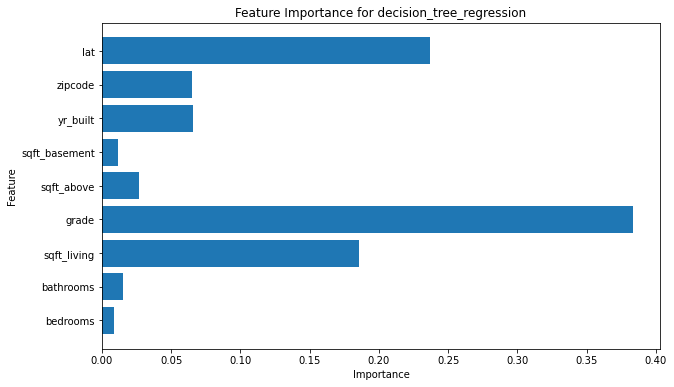


Model: random_forest_regression
Mean Squared Error: 15249369387.467133
Root Mean Square Error: 123488.33705037546
Mean Absolute Error: 75110.90294110635
R^2 Score: 0.8202957934006595
Mean Absolute Percentage Error: 0.1507060835306336

Feature Importance:
bedrooms: 0.009136362950102473
bathrooms: 0.014229266506767873
sqft_living: 0.18227341134527608
grade: 0.38626887961610906
sqft_above: 0.02988510599446123
sqft_basement: 0.012811976173987962
yr_built: 0.07024343511073754
zipcode: 0.06032966932697174
lat: 0.23482189297558606


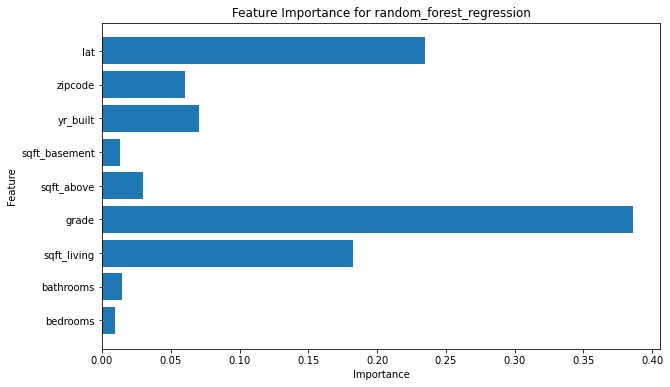


Model: gradient_boosting_regression
Mean Squared Error: 15511178535.117111
Root Mean Square Error: 124543.88196582404
Mean Absolute Error: 79452.98609909673
R^2 Score: 0.817210537613128
Mean Absolute Percentage Error: 0.15984752418001782

Feature Importance:
bedrooms: 0.001443905958361004
bathrooms: 0.007410410701408836
sqft_living: 0.27474072028016155
grade: 0.35204479399271665
sqft_above: 0.01058870154233226
sqft_basement: 0.0019330896839779529
yr_built: 0.05491497210092889
zipcode: 0.055972079009229465
lat: 0.24095132673088343


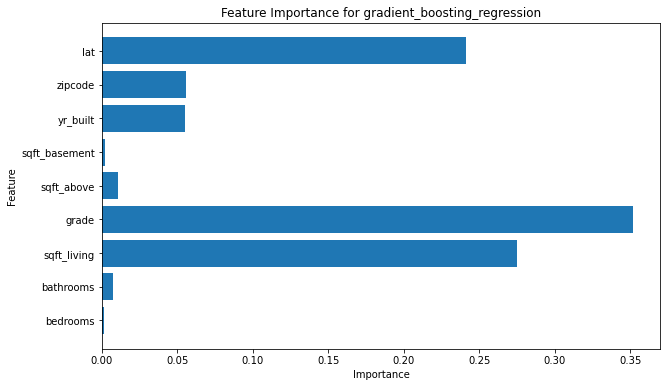


Model: CatBoost
Mean Squared Error: 12900712601.128744
Root Mean Square Error: 113581.30392423194
Mean Absolute Error: 69896.8964090259
R^2 Score: 0.8479732332763028
Mean Absolute Percentage Error: 0.14016397606278924

Feature Importance:
bedrooms: 0.9902827611789586
bathrooms: 2.6695633070125284
sqft_living: 16.22460887487977
grade: 16.49025767964685
sqft_above: 3.7149086504530837
sqft_basement: 2.1017347636345627
yr_built: 8.074448253258241
zipcode: 14.099064017100059
lat: 35.63513169283594


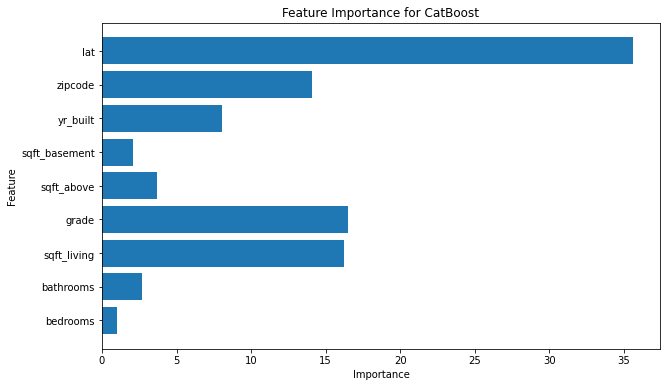


Model: Neural Network
Mean Squared Error: 81750036851.89264
Root Mean Square Error: 285919.63355441793
Mean Absolute Error: 221631.4650051097
R^2 Score: 0.03662734250440325
Mean Absolute Percentage Error: 0.46154112963114274

Model: elastic_net
Mean Squared Error: 32040651073.76352
Root Mean Square Error: 178999.02534305464
Mean Absolute Error: 119896.59961815756
R^2 Score: 0.6224211222223309
Mean Absolute Percentage Error: 0.24958455308735142



In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

for name, model in models.items():
    model.fit(X_train_scaled, y_train)  
    predictions = model.predict(X_test_scaled)  

    mse = mean_squared_error(y_test, predictions)
    rmse = mse**0.5
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    mape = mean_absolute_percentage_error(y_test, predictions)

    print(f"Model: {name}")
    print(f"Mean Squared Error: {mse}")
    print(f'Root Mean Square Error: {rmse}')
    print(f"Mean Absolute Error: {mae}")
    print(f"R^2 Score: {r2}")
    print(f"Mean Absolute Percentage Error: {mape}")

    if hasattr(model, 'feature_importances_'):
        feature_importance = model.feature_importances_
        print("\nFeature Importance:")
        for i, importance in enumerate(feature_importance):
            print(f"{X.columns[i]}: {importance}")

        plt.figure(figsize=(10, 6))
        plt.barh(X.columns, feature_importance)
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.title(f'Feature Importance for {name}')
        plt.show()
    
    print()


После стандартизации признаков большинство моделей регрессии показали стабильное качество предсказаний, с незначительными изменениями в метриках, однако, модели, чувствительные к масштабированию признаков, такие как деревья решений и нейронные сети, показали ухудшение производительности. Модели Random Forest, Gradient Boosting и CatBoost остаются наилучшими для прогнозирования цен на дома в округе Кинг после стандартизации признаков.

__Проанализировав важность признаков, получаем вывод:__
1. Все модели включают grade, sqft_living и lat в список наиболее важных признаков, что указывает на их существенное влияние на предсказания стоимости жилья.
2. Сравнивая методы, можно отметить, что Gradient Boosting и Random Forest имеют схожие важные признаки, что логично, учитывая их схожий базис в деревьях решений. CatBoost, хотя и отличается важностью признаков, также ориентирован на те же основные характеристики, но с более сильным уклоном в lat.
3. Decision Tree, несмотря на хорошую производительность, более чувствителен к переобучению из-за своей простоты и односторонней ориентации на обучающие данные.

##  RandomizedSearchCV

In [33]:
models_params = {
    "linear_regression": {
        "model": LinearRegression(),
        "params": {}
    },
    "ridge_regression": {
        "model": Ridge(),
        "params": {
            "alpha": uniform(0.1, 10.0)
        }
    },
    "lasso_regression": {
        "model": Lasso(),
        "params": {
            "alpha": uniform(0.1, 10.0)
        }
    },
    "decision_tree_regression": {
        "model": DecisionTreeRegressor(),
        "params": {
            "max_depth": [None, 5, 10, 20],
            "min_samples_split": uniform(0.01, 1.0),
            "min_samples_leaf": uniform(0.01, 0.5)
        }
    },
    "random_forest_regression": {
        "model": RandomForestRegressor(),
        "params": {
            "n_estimators": [10, 50, 100, 200],
            "max_depth": [None, 5, 10, 20],
            "min_samples_split": uniform(0.01, 1.0),
            "min_samples_leaf": uniform(0.01, 0.5)
        }
    },
    "gradient_boosting_regression": {
        "model": GradientBoostingRegressor(),
        "params": {
            "n_estimators": [10, 50, 100, 200],
            "learning_rate": uniform(0.01, 0.5),
            "max_depth": [3, 5, 10],
            "min_samples_split": uniform(0.01, 1.0),
            "min_samples_leaf": uniform(0.01, 0.5),
            "subsample": uniform(0.5, 0.5)
        }
    },
    'CatBoost': {
        "model": CatBoostRegressor(verbose=0),
        "params": {
            "iterations": [100, 500, 1000],
            "learning_rate": uniform(0.01, 0.1),
            "depth": [3, 5, 7, 10]
        }
    },
    'Neural Network': {
        "model": MLPRegressor(max_iter=500),
        "params": {
            "hidden_layer_sizes": [(50,), (100,), (50, 50)],
            "activation": ['relu', 'tanh'],
            "solver": ['adam', 'sgd'],
            "alpha": uniform(0.0001, 0.01)
        }
    },
    "elastic_net": {
        "model": ElasticNet(),
        "params": {
            "alpha": uniform(0.1, 10.0),
            "l1_ratio": uniform(0.1, 0.9)
        }
    }
}


for name, model_params in models_params.items():
    model = model_params["model"]
    params = model_params["params"]
    
    search = RandomizedSearchCV(model, params, n_iter=10, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
    
    search.fit(X_train, y_train)
    
    y_pred = search.best_estimator_.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse**0.5
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    print(f"Model: {name}")
    print(f"Best Parameters: {search.best_params_}")
    print(f"Mean Squared Error: {mse}")
    print(f'Root Mean Square Error: {rmse}')
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Absolute Percentage Error: {mape}")
    print(f"R^2 Score: {r2}")
    print("\n")

Model: linear_regression
Best Parameters: {}
Mean Squared Error: 28278801160.3242
Root Mean Square Error: 168163.01959802042
Mean Absolute Error: 115436.53068242533
Mean Absolute Percentage Error: 0.24216807758072592
R^2 Score: 0.6667521523694533


Model: ridge_regression
Best Parameters: {'alpha': 0.30161178097799046}
Mean Squared Error: 28279117603.96729
Root Mean Square Error: 168163.96047895425
Mean Absolute Error: 115434.90896021744
Mean Absolute Percentage Error: 0.24216395574961813
R^2 Score: 0.6667484232805729


Model: lasso_regression
Best Parameters: {'alpha': 9.178705617774105}
Mean Squared Error: 28279189521.90937
Root Mean Square Error: 168164.17431162135
Mean Absolute Error: 115434.37760239972
Mean Absolute Percentage Error: 0.24216068269726615
R^2 Score: 0.6667475757729553


Model: decision_tree_regression
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 0.054628942683680896, 'min_samples_split': 0.1261826243036851}
Mean Squared Error: 32296149894.52818
Root Mean S

__Время обучения моделей__

In [36]:
models = {
    "linear_regression": LinearRegression(),
    "ridge_regression": Ridge(alpha=0.30161178097799046),
    "lasso_regression": Lasso(alpha=9.178705617774105),
    "decision_tree_regression": DecisionTreeRegressor(max_depth=20, min_samples_leaf=0.054628942683680896, min_samples_split=0.1261826243036851),
    "random_forest_regression": RandomForestRegressor(max_depth=20, min_samples_leaf=0.07764846896500481, min_samples_split=0.2351369908047164, n_estimators=50),
    "gradient_boosting_regression": GradientBoostingRegressor(learning_rate=0.2841193522734417, max_depth=10, min_samples_leaf=0.05129736093727882, min_samples_split=0.376528843782182, n_estimators=100, subsample=0.8385233019535756),
    "CatBoost": CatBoostRegressor(depth=7, iterations=1000, learning_rate=0.06644433420811748, verbose=0),
    "Neural Network": MLPRegressor(activation='relu', alpha=0.004609157226202609, hidden_layer_sizes=(50,), solver='adam'),
    "elastic_net": ElasticNet(alpha=2.965906887001094, l1_ratio=0.9303743030606071)
}


In [38]:
def train_models(models, X_train, y_train):
    training_times = {}
    
    for name, model in models.items():
        start_time = time()
        model.fit(X_train, y_train)
        end_time = time()
        training_time = end_time - start_time
        training_times[name] = training_time
        
    return training_times

training_times = train_models(models, X_train, y_train)
print(training_times)

{'linear_regression': 0.013625621795654297, 'ridge_regression': 0.006001710891723633, 'lasso_regression': 0.33165836334228516, 'decision_tree_regression': 0.08907341957092285, 'random_forest_regression': 1.6585097312927246, 'gradient_boosting_regression': 5.03954291343689, 'CatBoost': 12.386582374572754, 'Neural Network': 39.58515524864197, 'elastic_net': 0.33426570892333984}


| Model                          | Mean Squared Error  | Root Mean Square Error | Mean Absolute Error | Mean Absolute Percentage Error | R^2 Score    | Training Time (s) |
|--------------------------------|----------------------|------------------------|---------------------|--------------------------------|--------------|-------------------|
| linear_regression              | 28278801160.32420    | 168163.01960           | 115436.53068        | 0.24217                        | 0.66675      | 0.01363           |
| ridge_regression               | 28279117603.96729    | 168163.96048           | 115434.90896        | 0.24216                        | 0.66675      | 0.00600           |
| lasso_regression               | 28279189521.90937    | 168164.17431           | 115434.37760        | 0.24216                        | 0.66675      | 0.33166           |
| decision_tree_regression       | 32296149894.52818    | 179711.29596           | 116597.88057        | 0.22966                        | 0.61941      | 0.08907           |
| random_forest_regression       | 41232460959.69759    | 203057.77739           | 134829.02327        | 0.28177                        | 0.51410      | 1.65851           |
| gradient_boosting_regression   | 17475900987.07483    | 132196.44847           | 84509.01899         | 0.16844                        | 0.79406      | 5.03954           |
| CatBoost                       | 12762164724.54022    | 112969.75137           | 69154.17402         | 0.13868                        | 0.84961      | 12.38658          |
| Neural Network                 | 45293980727.92548    | 212823.82556           | 153667.11140        | 0.33948                        | 0.46624      | 39.58516          |
| elastic_net                    | 33848269082.30352    | 183978.99087           | 129330.51797        | 0.28221                        | 0.60112      | 0.33427           |


1. Linear Regression, Ridge Regression, Lasso Regression: Модели демонстрируют сопоставимые результаты как с параметрами, так и без них. Это связано с тем, что они не имеют гиперпараметров для настройки, поэтому результаты остаются примерно одинаковыми.
2. Decision Tree Regression, Random Forest Regression, Gradient Boosting Regression, CatBoost, Neural Network, Elastic Net: Во всех этих моделях параметры позволяют получить значительное улучшение производительности по сравнению с базовыми моделями. Например, в случае градиентного бустинга и CatBoost значительное сокращение средней абсолютной ошибки и повышение коэффициента детерминации (R^2).
3. Время обучения: Обучение моделей с параметрами может занять значительно больше времени, особенно для моделей, требующих большого количества итераций, как Neural Network и CatBoost. Тем не менее, улучшение производительности, которое они предоставляют, может оправдать дополнительные затраты времени на обучение.

### Вывод

В ходе работы были исследованы различные модели машинного обучения для задачи регрессии.

1. Наилучшие модели:
- CatBoost и Gradient Boosting Regression продемонстрировали наилучшую производительность по метрикам качества (Mean Squared Error, Root Mean Square Error, Mean Absolute Error, R^2 Score, Mean Absolute Percentage Error).
- Обе эти модели способны достигать высокой точности предсказаний и эффективны в решении задачи регрессии.
2.  Выбор модели:
- Наилучший выбор - CatBoost и Gradient Boosting Regression.
3. Итог:
- Решение о выборе конкретной модели зависит от баланса между качеством предсказаний и временем обучения.
В целом, для этой задачи регрессии CatBoost и Gradient Boosting Regression оказались наилучшими моделями, обеспечивая высокую точность и достаточно быстрое обучение.